In [181]:
cd C:\Users\Admin\OneDrive - Lappeenrannan Teknillinen Yliopisto\Omat opiskelut\TUT_ML_kurssi\TUT_acoustic_data

C:\Users\Admin\OneDrive - Lappeenrannan Teknillinen Yliopisto\Omat opiskelut\TUT_ML_kurssi\TUT_acoustic_data


In [182]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn import cross_validation
%matplotlib inline

In [183]:
train_data = np.load('X_train.npy')

train_labels = pd.DataFrame(pd.read_csv('y_train.csv'))

cross_validation_csv = pd.read_csv('crossvalidation_train.csv')

test_data = np.load('X_test.npy')


train_data_separated = pd.DataFrame(columns = [i for i in range(80)])
test_data_separated = pd.DataFrame(columns = [i for i in range(80)])

In [184]:
train_data_separated_labels = pd.DataFrame(columns= ['labels'])
test_data_separated_labels = pd.DataFrame(columns= ['labels'])


In [185]:
test_data = np.transpose(test_data, (0,2,1))
print(test_data.shape)

(1500, 501, 40)


In [186]:
train_data = np.transpose(train_data, (0, 2, 1))
print(train_data.shape)

(4500, 501, 40)


In [187]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# for i in range(len(train_data)):
#     train_data[i] = scaler.fit_transform(train_data[i])
#     if i < len(test_data):
#         test_data[i] = scaler.transform(test_data[i])

In [188]:
# this takes mean for data, axis= 1 is vertical, axi = 2 is horizontal 
#Lets take mean for each spectrogram bin 
train_meaned_data = np.mean([train_data[i] for i in range(0,4500)], axis=1)
train_meaned_data = pd.DataFrame(train_meaned_data)

# MAX
train_max_data = np.amax([train_data[i] for i in range(0,4500)], axis=1)
train_max_data = pd.DataFrame(train_max_data)
#MIN
train_min_data = np.amin([train_data[i] for i in range(0,4500)], axis=1)
train_min_data = pd.DataFrame(train_min_data)
# VARIANCE
train_varianced_data = np.var([train_data[i] for  i in range(0,4500)], axis=1)
train_varianced_data = pd.DataFrame(train_varianced_data)
# MAX-MIN
train_max_minus_min = (np.amax([train_data[i] for i in range(0,4500)], axis=1)) - (np.amin([train_data[i] for i in range(0,4500)], axis=1))
train_max_minus_min = pd.DataFrame(train_max_minus_min)
# KURTOSIS
train_data_kurtosis = scipy.stats.kurtosis([train_data[i] for i in range(0,4500)], axis=1)
train_data_kurtosis = pd.DataFrame(train_data_kurtosis)

# SKEWNESS
train_data_skewness = scipy.stats.skew([train_data[i] for i in range(0,4500)], axis=1)
train_data_skewness = pd.DataFrame(train_data_skewness)

# THEN FOR TEST DATA
# MAX
test_max_data = np.amax([test_data[i] for i in range(0,1500)],axis = 1)
test_max_data = pd.DataFrame(test_max_data)
# MIN
#test_min_data = np.amin([test_data[i] for i in range(0,1500)],axis = 1)
#test_min_data = pd.DataFrame(test_min_data)

#MEAN
test_meaned_data = np.mean([test_data[i] for i in range(0,1500)],axis = 1)
test_meaned_data = pd.DataFrame(test_meaned_data)
# VARIANCE
test_varianced_data = np.var([test_data[i] for i in range(0,1500)], axis = 1)
test_varianced_data = pd.DataFrame(test_varianced_data)
# MAX - MIN
#test_max_minus_min = (np.amax([test_data[i] for i in range(0,1500)], axis=1)) - (np.amin([test_data[i] for i in range(0,1500)], axis=1))
#test_max_minus_min = pd.DataFrame(test_max_minus_min)
# KURTOSIS 
test_data_kurtosis = scipy.stats.kurtosis([test_data[i] for i in range(0,1500)], axis=1)
test_data_kurtosis = pd.DataFrame(test_data_kurtosis)

# SKEWNESS
test_data_skewness = scipy.stats.skew([test_data[i] for i in range(0,1500)], axis=1)
test_data_skewness = pd.DataFrame(test_data_skewness)

print(train_meaned_data.shape, test_meaned_data.shape)
#print(train_max_data.shape, test_max_data.shape)
#print(train_min_data.shape, test_min_data.shape)
print(train_varianced_data.shape, test_varianced_data.shape)
#print(train_max_minus_min.shape, test_max_minus_min.shape)


(4500, 40) (1500, 40)
(4500, 40) (1500, 40)


In [189]:
train_meaned_data = np.concatenate((train_meaned_data,train_max_data), axis = 1)
#train_meaned_data = np.concatenate((train_meaned_data,train_min_data), axis = 1)
train_meaned_data = np.concatenate((train_meaned_data,train_varianced_data), axis = 1)
train_meaned_data = np.concatenate((train_meaned_data,train_data_kurtosis), axis = 1)
train_meaned_data = np.concatenate((train_meaned_data,train_data_skewness), axis = 1)
#train_meaned_data = np.concatenate((train_meaned_data,train_max_minus_min), axis = 1)

#test_meaned_data = np.concatenate((test_meaned_data,test_min_data), axis = 1)
test_meaned_data = np.concatenate((test_meaned_data,test_max_data), axis = 1)
test_meaned_data = np.concatenate((test_meaned_data,test_varianced_data), axis = 1)
test_meaned_data = np.concatenate((test_meaned_data,test_data_kurtosis), axis = 1)
test_meaned_data = np.concatenate((test_meaned_data,test_data_skewness), axis = 1)
#test_meaned_data = np.concatenate((test_meaned_data,test_max_minus_min), axis = 1)


In [190]:
print(train_meaned_data.shape, test_meaned_data.shape)

(4500, 200) (1500, 200)


In [191]:
train_data = pd.DataFrame(train_meaned_data)
test_data = pd.DataFrame(test_meaned_data)

In [192]:
# Splitting the data according to the proposed split defined by cross_validation_csv
# train_data_separated = pd.read_pickle("train_set.pkl")
# test_data_separated = pd.read_pickle("test_set.pkl")
if train_data_separated.shape != (3268,80):
    for i in range(len(cross_validation_csv)):
        if cross_validation_csv['set'][i] == 'train':
            train_data_separated = train_data_separated.append(train_data.loc[i,:])
            if i % 100 == 0:
                print("i is now ", i,"/",len(train_meaned_data))
        elif cross_validation_csv['set'][i] == 'test':
            test_data_separated = test_data_separated.append(train_data.loc[i,:])
            if i % 100 == 0:
                print("i is now ", i,"/",len(train_meaned_data))
print(train_data_separated.shape)
print(test_data_separated.shape)
        

i is now  0 / 4500
i is now  100 / 4500
i is now  200 / 4500
i is now  300 / 4500
i is now  400 / 4500
i is now  500 / 4500
i is now  600 / 4500
i is now  700 / 4500
i is now  800 / 4500
i is now  900 / 4500
i is now  1000 / 4500
i is now  1100 / 4500
i is now  1200 / 4500
i is now  1300 / 4500
i is now  1400 / 4500
i is now  1500 / 4500
i is now  1600 / 4500
i is now  1700 / 4500
i is now  1800 / 4500
i is now  1900 / 4500
i is now  2000 / 4500
i is now  2100 / 4500
i is now  2200 / 4500
i is now  2300 / 4500
i is now  2400 / 4500
i is now  2500 / 4500
i is now  2600 / 4500
i is now  2700 / 4500
i is now  2800 / 4500
i is now  2900 / 4500
i is now  3000 / 4500
i is now  3100 / 4500
i is now  3200 / 4500
i is now  3300 / 4500
i is now  3400 / 4500
i is now  3500 / 4500
i is now  3600 / 4500
i is now  3700 / 4500
i is now  3800 / 4500
i is now  3900 / 4500
i is now  4000 / 4500
i is now  4100 / 4500
i is now  4200 / 4500
i is now  4300 / 4500
i is now  4400 / 4500
(3268, 200)
(1232, 200

In [193]:
# Splitting the labels according to the proposed split defined by cross_validation_csv
# train_data_separated_labels = pd.read_pickle("train_set_labels.pkl")
# test_data_separated_labels = pd.read_pickle("test_set_labels.pkl")
if train_data_separated_labels.shape != (3268,3):
    for i in range(len(cross_validation_csv)):
        if cross_validation_csv['set'][i] == 'train':
            train_data_separated_labels = train_data_separated_labels.append(train_labels.loc[i,:])
            if i % 100 == 0:
                print("i is now ", i)
        elif cross_validation_csv['set'][i] == 'test':
            test_data_separated_labels = test_data_separated_labels.append(train_labels.loc[i,:])
            if i % 100 == 0:
                print("i is now", i)
print(train_data_separated_labels.shape)
print(test_data_separated_labels.shape)

i is now  0
i is now  100
i is now  200
i is now 300
i is now 400
i is now  500
i is now  600
i is now  700
i is now 800
i is now  900
i is now  1000
i is now  1100
i is now 1200
i is now  1300
i is now  1400
i is now 1500
i is now 1600
i is now  1700
i is now  1800
i is now  1900
i is now  2000
i is now  2100
i is now 2200
i is now  2300
i is now  2400
i is now 2500
i is now 2600
i is now  2700
i is now 2800
i is now 2900
i is now 3000
i is now 3100
i is now 3200
i is now 3300
i is now  3400
i is now 3500
i is now  3600
i is now  3700
i is now  3800
i is now  3900
i is now  4000
i is now  4100
i is now 4200
i is now  4300
i is now  4400
(3268, 3)
(1232, 3)


In [194]:
# SCALE DATA, NOW EACH FEATURE TO SCALE MUST BE SAME COLUMN-WISE ie matrix is m x n where m is rows and n columns and n=num_features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data_separated = scaler.fit_transform(train_data_separated)
test_data_separated = scaler.transform(test_data_separated)
test_data = scaler.transform(test_meaned_data)

In [195]:
# Making a label fix function 
def label_fix(label):
    if label =='cafe/restaurant':
        return 0
    elif label =='home':
        return 1
    elif label =='office':
        return 2
    elif label =='grocery store':
        return 3
    elif label =='park':
        return 4
    elif label =='train':
        return 5
    elif label =='library':
        return 6
    elif label =='beach':
        return 7
    elif label =='forest path':
        return 8
    elif label =='car':
        return 9
    elif label =='tram':
        return 10
    elif label =='residential area':
        return 11
    elif label =='metro station':
        return 12
    elif label =='bus':
        return 13
    elif label =='city center':
        return 14

In [196]:
test_data_separated_labels.head()

,labels,id,scene_label
2,NaN,2.0,office
13,NaN,13.0,park
31,NaN,31.0,forest path
32,NaN,32.0,train
38,NaN,38.0,forest path


In [197]:
# Applying label fix function to train and test set label dataframes and then just taking the relevant data from those
train_data_separated_labels['scene_label'] = train_data_separated_labels['scene_label'].apply(label_fix)
test_data_separated_labels['scene_label'] = test_data_separated_labels['scene_label'].apply(label_fix)
train_data_separated_labels = train_data_separated_labels['scene_label']
test_data_separated_labels = test_data_separated_labels['scene_label']
train_data_separated_labels.head(20)
test_data_separated_labels.head(20)

2      2
13     4
31     8
32     5
38     8
39     4
42     4
44    11
46     4
48    13
52     5
56    12
60     1
63    13
64     2
68     1
69    10
72     0
76    12
79     6
Name: scene_label, dtype: int64

TESTING WITH KERAS

In [198]:
import keras
from keras.callbacks import *
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization


In [293]:
#INPUT LAYER
model = Sequential()

# INPUT

model.add(Dense(200, init='uniform',input_dim=200,activity_regularizer=regularizers.l1(0.00007)))
model.add(Dropout(0.3))
model.add(Activation('relu'))
# HIDDEN 1


model.add(Dense(200, init='uniform',activity_regularizer=regularizers.l1(0.00007)))
model.add(Dropout(0.3))
model.add(Activation('relu'))

# model.add(Dropout(0.25))
# model.add(Dense(200,init='uniform',activity_regularizer=regularizers.l1(0.00003)))
# model.add(Activation('relu'))

# OUTPUT
model.add(Dense(15, activation='softmax'))

C:\Users\Admin\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", input_dim=200, activity_regularizer=<keras.reg...)`
  
C:\Users\Admin\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, kernel_initializer="uniform", activity_regularizer=<keras.reg...)`
  if sys.path[0] == '':


In [294]:
# CREATING A CALLBACK FUNCTION TO TEST MODEL PERFORMANCE
class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        if epoch % 5 == 0:
            loss, acc = self.model.evaluate(x, y, verbose=0)
            print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

Compile the Model

In [295]:
from tensorflow.contrib.keras import losses, optimizers, metrics

In [296]:
losses.sparse_categorical_crossentropy

<function tensorflow.python.keras._impl.keras.losses.sparse_categorical_crossentropy>

In [297]:
adam= keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [298]:
model.compile(optimizer= adam,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

Train Model

In [304]:
history = model.fit(train_data_separated,train_data_separated_labels,batch_size = 64, epochs=30,validation_data=(test_data_separated,test_data_separated_labels))

Train on 3268 samples, validate on 1232 samples
Epoch 1/30
3268/3268 [==============================] - 0s 99us/step - loss: 0.7650 - acc: 0.8467 - val_loss: 1.3754 - val_acc: 0.6875
Epoch 2/30
3268/3268 [==============================] - 0s 96us/step - loss: 0.6852 - acc: 0.8623 - val_loss: 1.2378 - val_acc: 0.7086
Epoch 3/30
3268/3268 [==============================] - 0s 93us/step - loss: 0.6281 - acc: 0.8911 - val_loss: 1.2245 - val_acc: 0.7013
Epoch 4/30
3268/3268 [==============================] - 0s 92us/step - loss: 0.6501 - acc: 0.8788 - val_loss: 1.2702 - val_acc: 0.6924
Epoch 5/30
3268/3268 [==============================] - 0s 89us/step - loss: 0.7167 - acc: 0.8568 - val_loss: 1.2743 - val_acc: 0.6778
Epoch 6/30
3268/3268 [==============================] - 0s 87us/step - loss: 0.7520 - acc: 0.8482 - val_loss: 1.3333 - val_acc: 0.6802
Epoch 7/30
3268/3268 [==============================] - 0s 95us/step - loss: 0.6910 - acc: 0.8724 - val_loss: 1.2498 - val_acc: 0.7005
Epoch 8

In [305]:
predictions = model.predict_classes(test_data_separated)
predictions_to_commit = model.predict_classes(test_data)

In [306]:
from sklearn.metrics import confusion_matrix,classification_report

             precision    recall  f1-score   support

          0       0.53      0.64      0.58        59
          1       0.78      0.75      0.76        87
          2       0.65      0.89      0.75        54
          3       0.59      0.82      0.68        62
          4       0.52      0.58      0.55        74
          5       0.68      0.77      0.72        78
          6       0.85      0.68      0.75       102
          7       0.88      0.77      0.82        95
          8       0.87      0.74      0.80       102
          9       0.79      0.85      0.82        79
         10       0.87      0.58      0.69       128
         11       0.53      0.66      0.59        67
         12       0.90      0.77      0.83        98
         13       0.47      0.69      0.56        55
         14       0.91      0.78      0.84        92

avg / total       0.75      0.72      0.73      1232

dict_keys(['val_loss', 'loss', 'acc', 'val_acc'])


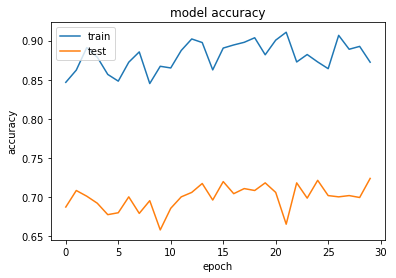

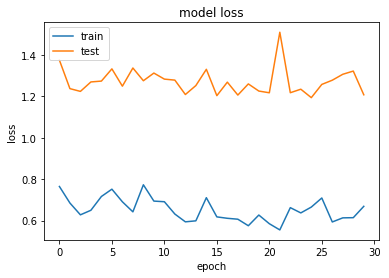

In [307]:
print(classification_report(predictions,test_data_separated_labels))

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [308]:
predictions_to_commit = pd.DataFrame(predictions_to_commit, columns = ["Scene_label"])
predictions_to_commit.index.name = 'Id'

In [309]:
predictions_to_commit.head(20)

,Scene_label
Id,
0,4
1,8
2,2
3,5
4,4
5,13
6,8
7,10
8,0


In [310]:
# Making a label fix function 
def label_fix_numbers_to_scenes(label):
    if label ==0:
        return 'cafe/restaurant'
    elif label ==1:
        return 'home'
    elif label ==2:
        return 'office'
    elif label ==3:
        return 'grocery store'
    elif label ==4:
        return 'park'
    elif label ==5:
        return 'train'
    elif label ==6:
        return 'library'
    elif label ==7:
        return 'beach'
    elif label ==8:
        return 'forest path'
    elif label ==9:
        return 'car'
    elif label ==10:
        return 'tram'
    elif label ==11:
        return 'residential area'
    elif label ==12:
        return 'metro station'
    elif label ==13:
        return 'bus'
    elif label ==14:
        return 'city center'

In [311]:
predictions_to_commit["Scene_label"] = predictions_to_commit["Scene_label"].apply(label_fix_numbers_to_scenes)
predictions_to_commit.head(5)



,Scene_label
Id,
0,park
1,forest path
2,office
3,train
4,park


In [312]:
final_for_commit = predictions_to_commit.to_csv('final_data.csv')
